In [137]:
import pandas
%load_ext rpy2.ipython
from scipy.stats import ttest_ind

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [138]:
ab5000 = pandas.read_csv("host images/res_ab_rand_5000.csv", names=['orig_row','nfaces','nsmiles'])
csdirty = pandas.read_csv("host images/res_cs_rand_5000.csv", names=['orig_row','nfaces','nsmiles'])
cswasnan = pandas.read_csv("host images/cswasnan.csv")

In [139]:
cswasnan.head()

,Unnamed: 0,imageurl,host_picture_url,notfake,wasnan
0,/people/a_frye,NaN,NaN,NaN,True
1,/people/a_gustavison,NaN,NaN,NaN,True
2,/people/a_mamezhanova,NaN,NaN,NaN,True
3,/people/a_w_spoon,NaN,NaN,NaN,True
4,/people/aaron_cox_144,NaN,NaN,NaN,True


In [140]:
ab = ab5000[:4199]

In [141]:
nan_users = list(cswasnan['Unnamed: 0'])

In [142]:
cs = csdirty[csdirty['orig_row'].apply(lambda x: x not in nan_users)]

In [143]:
len(cs)

4199

In [144]:
ab['site']='ab'
cs['site']='cs'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [145]:
abcs = ab.append(cs, ignore_index=True)

In [146]:
abcs.head()

,orig_row,nfaces,nsmiles,site
0,10003199,0,0,ab
1,10014288,1,0,ab
2,10024293,0,0,ab
3,10024706,1,1,ab
4,10029757,1,0,ab


# Tests

+ average number of faces, site, t-test
+ number of no faces, site, t-test
+ number of multifaces, site, max
+ smiles per facs, site, t-test

In [147]:
%Rpush abcs

/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


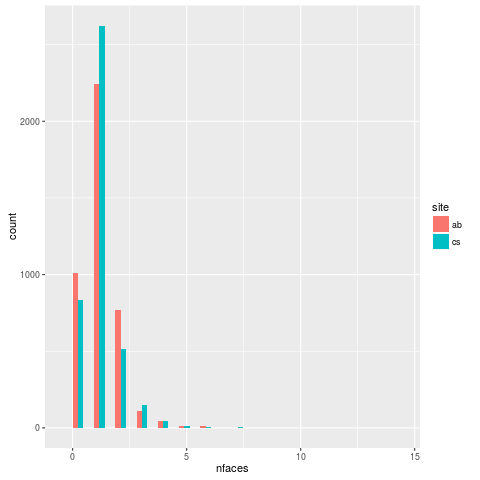

In [148]:
%%R
library(ggplot2)
ph <- ggplot(abcs, aes(nfaces, fill=site)) + geom_histogram(position="dodge")
print(ph)

# Both have mostly average 1 or 0 faces

In [149]:
abfaces, csfaces = ab['nfaces'], cs['nfaces'] 
t, p= ttest_ind(abfaces, csfaces)
print(abfaces.mean(), csfaces.mean())
print(t, p)

1.06072874494 1.06287211241
-0.11057734751592084 0.911954154328


In [150]:
ab['anyfaces'] = ab['nfaces']!=0
cs['anyfaces'] = cs['nfaces']!=0

ab['multifaces'] = ab['nfaces']>1
cs['multifaces'] = cs['nfaces']>1

abhasface = ab[ab['anyfaces']==True]
cshasface = cs[cs['anyfaces']==True]

abhas1face = ab[ab['nfaces']==1]
cshas1face = cs[cs['nfaces']==1]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

# Any faces

In [151]:
abanyfaces, csanyfaces = ab['anyfaces'], cs['anyfaces'] 
t, p= ttest_ind(abanyfaces, csanyfaces)
print(abanyfaces.mean(), csanyfaces.mean())
print(t, p)

0.759704691593 0.800904977376
-4.564595042988233 5.07577524697e-06


# Multifaces

In [152]:
abmultifaces, csmultifaces = ab['multifaces'], cs['multifaces'] 
t, p= ttest_ind(abmultifaces, csmultifaces)
print(abmultifaces.mean(), csmultifaces.mean())
print(t, p)

0.22600619195 0.175994284353
5.728687711659767 1.04701687163e-08


# Avg Smiles

In [68]:
absmiles, cssmiles = ab['nsmiles'], cs['nsmiles'] 
t, p= ttest_ind(absmiles, cssmiles)
print(absmiles.mean(), cssmiles.mean())
print(t, p)

0.792358471694 0.558911782356
14.49028155459759 4.18358806142e-47


# Smile if Face

In [ ]:
absmilesifface, cssmilesifface = abhasface['nsmiles'], cshasface['nsmiles'] 
t, p= ttest_ind(absmilesifface, cssmilesifface)
print(absmilesifface.mean(), cssmilesifface.mean())
print(t, p)

# Smile if 1 face

In [75]:
ab1smiles, cs1smiles = abhas1face['nsmiles'], cshas1face['nsmiles'] 
t, p= ttest_ind(ab1smiles, cs1smiles)
print(ab1smiles.mean(), cs1smiles.mean())
print(t, p)

0.717243975904 0.56631097561
11.582036695291261 1.1898960199e-30


# Export some things

In [79]:
abnofaces = ab[ab['nfaces']==0]
csnofaces = cs[cs['nfaces']==0]

In [80]:
abnofaces.to_csv('host images/abnofaces.csv', columns=['orig_row'])
csnofaces.to_csv('host images/csnofaces.csv', columns=['orig_row'])